In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from math import sin, pi, expm1
import random
import pdb


#-----------------------------------
# number of E- and I-cells:
num_e=2; num_i=2;
#-----------------------------------
# density of synaptic connections: 
p_ee=1.0; p_ei=1.0; p_ie=1.0; p_ii=1.0;
#-----------------------------------
# rise and decay time constants associated with synapses:
s1 = (num_e,)
s2 = (num_i,)
ss1=(num_e,1)
ss2=(num_e,1)
s_ee = (num_e,num_e)
s_ei = (num_e,num_i)
s_ie = (num_i,num_e)
s_ii = (num_i,num_i)

tau_r_e=0.1*np.ones(s1); tau_d_e=3*np.ones(s1); 
tau_r_i=0.3*np.ones(s2); tau_d_i=9*np.ones(s2); 
#-----------------------------------
# synaptic reversal potentials: 
v_rev_e=0; v_rev_i=-80;  
#-----------------------------------
# time simulated (in ms):
#t_final=200; 
t_final=np.arange(0,2000,0.05) #t_final=50
#-----------------------------------
# time step used in the midpoint method:
dt=0.02; #dt=0.0002
#-----------------------------------
# strength of synaptic connections: 
g_hat_ie=1.5; g_hat_ei=0.5; g_hat_ii=0.5; g_hat_ee=0.0;
#-----------------------------------
# external drive to the E-cells:

# deterministic drive:
#I_e=1.25*ones(num_e,1);
def I_e(v):
    return np.ones(s1)

# maximum conductance, decay time, and frequency of Poisson train of excitatory input pulses:
g_stoch_e=0; f_stoch_e=20; tau_d_stoch_e=3; 
#-----------------------------------
#-----------------------------------
# external drive to the I-cells:

# deterministic drive:
#I_i= zeros(num_i,1);
def I_i(v):
    return np.zeros(s2)
# maximum conductance, decay time, and frequency of Poisson train of excitatory input pulses:
g_stoch_i=0; f_stoch_i=0; tau_d_stoch_i=3; 
#-----------------------------------

In [ ]:
t_final.shape[0]

After running the previous initialization, run one of the following initializations to override variables and produce the specific plots shown in Figure 1. Then run the function definition box as well as the gamma simulation box before producing the desired graph.

In [ ]:
#Graph E Initialization
def I_e(v):
    return 4*sin(40*pi*v/1000)**8 + 4*sin(56*pi*v/1000)**2

In [ ]:
#Graph F Initialization
g_hat_ie = 0
def I_e(v):
    return 4*sin(40*pi*v/1000)**8 + 4*sin(56*pi*v/1000)**2

In [ ]:
#functions def
# The function expm1(x) = exp(x)-1
def f(x):
    for i in range(len(x)):
        if abs(x[i])<1e-12: 
            x[i]=1
        #elif abs(x[i])<1e-4:  
            #x[i]=-x[i]/expm1(-x[i])
        elif x[i]<-20:
            ex = np.exp(x[i])
            x[i] = -x[i]*ex/(1-ex)
        else : 
            x[i] = x[i]/(1-np.exp(-x[i]))
    return x

def g(x):
    
    for i in range(len(x)):
        #ex=np.exp(-x[i])
        #if abs(x[i])<1e-12: 
         #   x[i] = 1
        #if abs(x[i])<1e-4: 
            #x[i] = x[i]*ex/(1-ex)
        #if abs(x[i]< 0.1):
            #x[i]=1/(1+x[i]/2)
        #if x[i]>100: 
         #   x[i] = x[i]*ex/(1-ex)
        #else: 
        x[i] = x[i]/(np.exp(x[i])-1)
    return x



def h(x):
    for i in range(len(x)):
        if x[i] < -20:
            x[i] = np.exp(x[i])/(np.exp(x[i])+1)
        else: x[i]=1/(1+np.exp(-x[i]))
    return x
        
#αh(V) = 0.128 exp(−(V + 50)/18)
#βh(V) = 4/(1 + exp(−(V + 27)/5)

def h_e_inf(v):
    alpha_h = 0.128*np.exp(-(v+50)/18)
                                 
    def beta_h(v):
        u = (v+27)/5
        return 4*h(u)
    #breakpoint()
                                 
    return (alpha_h/(alpha_h+beta_h(v)))


#αh_i(V) = 0.07 exp(−(V + 58)/20)
#βh_i(V) = 1/(exp(−0.1(V + 28)) + 1)

def h_i_inf(v):
    alpha_h = 0.07*np.exp(-(v+58)/20)
                                 
    #beta_h = 1/(np.exp(-0.1*(v+28))+1)
    def beta_h(v):
        u = (v+28)/10
        return h(u) 
        
    
    return (alpha_h/(alpha_h+beta_h(v)))


#αm_e(V) = 0.32(V + 54)/(1 − exp(−(V + 54)/4))
#β m (V ) = 0.28(V + 27)/(exp((V + 27)/5) − 1)

def m_e_inf(v):
    def alpha_m(v):
        u = (v+54)/4
        return 4*0.32*f(u)
    
    def beta_m(v):
        u =(v+27)/5
        return 5*0.28*g(u)
    
    return (alpha_m(v)/(alpha_m(v)+beta_m(v)))

#αm_i(V) = 0.1(V + 35)/(1 − exp(−(V + 35)/10))
#βm_i(V) = 4 exp(−(V + 60)/18)

def m_i_inf(v):
    
    def alpha_m(v):
        u = (v+35)/10
        return 1*f(u)
    
    beta_m=4*np.exp(-(v+60)/18)
    return (alpha_m(v)/(alpha_m(v)+beta_m))

#αn_e (V ) = 0.032(V + 52)/(1 − exp(−(V + 52)/5))

def n_e_inf(v):
    
    def alpha_n(v):
        u= (v+52)/5
        return 0.032*5*f(u)
    
    beta_n=0.5*np.exp(-(v+65)/80)
    return (alpha_n(v)/(alpha_n(v)+ beta_n))



def n_i_inf(v):
    
    #alpha_n=0.01*(v+34)/(1-np.exp(-(v+34)/10))
    def alpha_n(v):
        u = (v+34)/10
        return 0.01*10*f(u)
        
    beta_n=0.125*np.exp(-(v+44)/80)
    return (alpha_n(v)/(alpha_n(v)+beta_n))

def tau_h_e(v):
    alpha_h = 0.128*np.exp(-(v+50)/18)
    
    #beta_h = 4/(1+np.exp(-(v+27)/5))                            
    def beta_h(v):
        u = (v+27)/5
        return 4*h(u)
    
    return 1/(alpha_h+beta_h(v))

def tau_h_i(v):
    alpha_h=0.07*np.exp(-(v+58)/20)
    
    #beta_h = 1/(np.exp(-0.1*(v+28))+1)
    def beta_h(v):
        u = (v+28)/10
        return h(u)  
    
    return 1/(alpha_h+beta_h(v))
    
def tau_n_e(v):
    #alpha_n=0.032*(v+52)/(1-np.exp(-(v+52)/5))
    def alpha_n(v):
        u= (v+52)/5
        return 0.032*5*f(u)
        
    beta_n=0.5*np.exp(-(v+57)/40)
    #breakpoint()
    
    return (1/(alpha_n(v)+beta_n))


def tau_n_i(v):
    
    #alpha_n=0.01*(v+34)/(1-np.exp(-(v+34)/10));
    def alpha_n(v):
        u = (v+34)/10
        return 0.01*10*f(u)
                                 
    beta_n=0.125*np.exp(-(v+44)/80);
    
    return (1/((alpha_n(v)+beta_n)));

#αm_e(V) = 0.32(V + 54)/(1 − exp(−(V + 54)/4))
#β m (V ) = 0.28(V + 27)/(exp((V + 27)/5) − 1)
def tau_m_e(v):
    
    def alpha_m(v):
        u = (v+54)/4
        return 4*0.32*f(u)
   
    def beta_m(v):
        u =(v+27)/5
        return 5*0.28*g(u)
   
    return (1 / (alpha_m(v) + beta_m(v)))

def tau_m_i(v):
    def alpha_m(v):
        u = (v+35)/10
        return 1*f(u)
    
    beta_m=4*np.exp(-(v+60)/18)
    return (1 / (alpha_m(v) + beta_m))

In [ ]:


def alpha_m(v):
        u = (v+54)/4
        return 4*0.32*f(u)
def beta_m(v):
        u =(v+27)/5
        return 5*0.28*g(u)
#for u in range(-20,-1,1):
#for i in range(190):
 #   x[i]=i-90
xx=np.arange(-90,100,0.05)

y= alpha_m(xx)
#plt.plot(xx,y);

z= beta_m(xx)
#plt.plot(xx,z)

zz=h_i_inf(xx)
plt.plot(xx,zz)

In [ ]:
y

In [ ]:
# I have left this part of the code here, so that you
# can understand the manipulations with the arrays that follow.

n_n=8
m_m=2

X = [None]
v_e=-80+30*np.random.rand(8,1);
n_e=0*np.ones(8) 
m_e=m_e_inf(v_e); 
h_e=0*np.ones(8);
v_i=1*np.ones(2)

X[:1*n_n] = v_e      # First n_n values are Membrane Voltage
X[1*n_n:2*n_n] = n_e  # Next n_n values are Sodium Activation Gating Variables
X[2*n_n:3*n_n] = m_e# Next n_n values are Sodium Inactivation Gating Variables
X[3*n_n:4*n_n] = h_e  # Next n_n values are Potassium Gating Variables
b=4*n_n
X[b:b+m_m]=v_i


In [ ]:
X

In [ ]:

# "part" refers to which part of question 4 is being answered. 
# If part == 1, then returns voltages for E-cells and I-cells
# If part == 2, then returns spike_times and cell_numbers for raster plots

    
    # Set up initial conditions

v_e=-80+30*np.random.rand(s1[0],);
n_e=n_e_inf(v_e) 
m_e=m_e_inf(v_e); 
h_e=h_e_inf(v_e); 
s_e=np.zeros(s1,);
v_i=-80+30*np.random.rand(s2[0],); 
n_i=n_i_inf(v_i); 
m_i=m_i_inf(v_i);
h_i=h_i_inf(v_i); 
s_i=np.zeros(s2,);
s_stoch_e=np.ones(s1,)
s_stoch_i=np.ones(s2,)
num_spikes_e=0; num_spikes_i=0;
v_rev_e=0; v_rev_i=-80; 


# Create a y0 vector to pass all initial conditions to the dXdt function
y0=np.zeros((5*num_e+5*num_i,))
   
y0[:num_e] = v_e                                    
y0[1*num_e:2*num_e] = n_e                           
y0[2*num_e:3*num_e] = m_e                             
y0[3*num_e:4*num_e] = h_e                           
y0[4*num_e:5*num_e] = s_e 
b=5*num_e
y0[b:b+num_i] = v_i
y0[b+num_i:b+2*num_i] = n_i
y0[b+2*num_i:b+3*num_i] = m_i
y0[b+3*num_i:b+4*num_i] = h_i
y0[b+4*num_i:b+5*num_i] = s_i
print("Initial y0 = ",y0)

    
dt05=dt/2;
m_steps1=np.floor(t_final/dt+0.1);
m_steps=m_steps1.astype(int)
#r_e=np.exp(-dt05/tau_d_stoch_e);
#r_i=np.exp(-dt05/tau_d_stoch_i);

    # set synaptic conductances

g_ee=g_hat_ee*np.divide(np.multiply(np.ones(s_ee),(np.sign(p_ee-np.random.rand(s_ee[0],s_ee[1]))+1)),2*(p_ee*num_e))
g_ei=g_hat_ei*np.divide(np.multiply(np.ones(s_ei),(np.sign(p_ei-np.random.rand(s_ei[0],s_ei[1]))+1)),2*(p_ei*num_e))
g_ie=g_hat_ie*np.divide(np.multiply(np.ones(s_ie),(np.sign(p_ie-np.random.rand(s_ie[0],s_ie[1]))+1)),2*(p_ie*num_i)) 
g_ii=g_hat_ii*np.divide(np.multiply(np.ones(s_ii),(np.sign(p_ii-np.random.rand(s_ii[0],s_ii[1]))+1)),2*(p_ii*num_i))
#breakpoint()   # Create arrays to store voltage data to draw action potential
voltages_e = np.array([])
voltages_i = np.array([])

    # Create new arrays to store data points for raster plot
cell_numbers = np.array([])
spike_times = np.array([])
iteration = 0
    
    # solve the system of Hodgkin-Huxley-like equations using the midpoint Runge-Kutta 4th order

C_m = 1      # Membrane Capacitance

g_K = 10     #conductance of potassium 
E_K = -95    #reversal potential for potassium

g_Na = 100   #conductance of sodium
E_Na = 50    #reversal potential for sodium

g_L = 0.15   #conductance of leak
E_L = -55    #reversal potential for leak (aka other we are not talking about)

 

def integrate(func,yy,t):
    
    time_delta_grid = t[1:] - t[:-1]
    y = np.zeros((yy.shape[0],t.shape[0]))
    y[:,0]=yy
    iteration=0
    
    
    
    # RK2 or RK4?

    #for i in range(time_delta_grid.shape[0]):
        #k1=(1/2)*epsilon*func(y[:,i-1],t[i-1])
        #breakpoint()
        #y[:,i] = y[:,i-1]+epsilon*func(y[:,i-1]+k1,t[i-1]+epsilon/2) # Runge-Kutta 2nd Order Integration Step
    
    for i in range(time_delta_grid.shape[0]):
        print("i = ",i)
        print("y[:,i] = ",y[:,i])
        k1 = func(y[:,i], time_delta_grid[i])# RK4 Integration Steps replace Euler's Updation Steps
        half_step = t[i] + time_delta_grid[i] / 2
        k2 = func(y[:,i] + time_delta_grid[i] * k1 / 2, time_delta_grid[i])
        k3 = func(y[:,i] + time_delta_grid[i] * k2 / 2, time_delta_grid[i])
        k4 = func(y[:,i] + time_delta_grid[i] * k3, time_delta_grid[i])
        y[:,i+1]= (k1 + 2 * k2 + 2 * k3 + k4) * (time_delta_grid[i] / 6) + y[:,i]
        print("y is after",y[:,i])
        
        
        v_e_old = y[:num_e,i]        # These four lines are not necessary, you can check the variable y directly
        v_e = y[:num_e,i+1]
        v_i_old = y[b:b+num_i,i]
        v_i = y[b:b+num_i,i+1]
        
        iteration += 1
        cell_numbers = [None]
        spike_times  = [None]               
                       
        for i in np.arange(num_e):
            if v_e_old[i] < 0 and v_e[i] >= 0:
                cell_numbers = np.append(cell_numbers, i + 2)
                spike_times = np.append(spike_times, iteration)
    
        #Check for spikes in I_cells
        
        for i in np.arange(num_i):
            if v_i_old[i] < 0 and v_i[i] >= 0:
                cell_numbers = np.append(cell_numbers, i)
                spike_times = np.append(spike_times, iteration)
    
        
        
        # Stochastic decay or jump to 1
        #s_stoch_e=np.ones(s1,)
        #s_stoch_i=np.ones(s2,)
        
        #s_stoch_e=s_stoch_e*r_e; s_stoch_i=s_stoch_i*r_i;
        #u_e=np.random.rand(num_e,1); u_i=np.random.rand(num_i,1);
        #s_stoch_e=s_stoch_e+np.multiply(np.maximum(np.sign(f_stoch_e*dt/1000-u_e),np.zeros(s1)),(1-s_stoch_e));
        #s_stoch_i=s_stoch_i+np.multiply(np.maximum(np.sign(f_stoch_i*dt/1000-u_i),np.zeros(s2)),(1-s_stoch_i));
        
        
    return y
    #, cell_numbers, spike_times

        
        
        
def dXdt(y,dt):
    
    du=dt
    
    iteration = 0
    cell_numbers1=0
    spike_times1 = 0
    
    g_stoch_e=0.07; f_stoch_e=20; tau_d_stoch_e=3;
    
    g_stoch_i=0.05; f_stoch_i=20; tau_d_stoch_i=3; 
    #breakpoint()
    
    #pdb.set_trace() 
    v_e = y[:num_e]                                      
    n_e = y[1*num_e:2*num_e]                         
    m_e = y[2*num_e:3*num_e]                              
    h_e = y[3*num_e:4*num_e]                             
    s_e = y[4*num_e:5*num_e]  
    b = 5*num_e
    v_i = y[b:b+num_i] 
    n_i = y[b+num_i:b+2*num_i] 
    m_i = y[b+2*num_i:b+3*num_i] 
    h_i = y[b+3*num_i:b+4*num_i] 
    s_i = y[b+4*num_i:b+5*num_i]  
    
    s_stoch_e=np.ones(s1)
    s_stoch_i=np.ones(s2)
    
    r_e=np.exp(-du/tau_d_stoch_e);
    r_i=np.exp(-du/tau_d_stoch_i);
    
    s_stoch_e=s_stoch_e*r_e; s_stoch_i=s_stoch_i*r_i;
    
    u_e=np.random.rand(num_e,); u_i=np.random.rand(num_i,);
    
    s_stoch_e=s_stoch_e+np.multiply(np.maximum(np.sign(f_stoch_e*dt/1000-u_e),np.zeros(s1)),(1-s_stoch_e));
    s_stoch_i=s_stoch_i+np.multiply(np.maximum(np.sign(f_stoch_i*dt/1000-u_i),np.zeros(s2)),(1-s_stoch_i));
    
    
    #MY F(T) FOR INCOMING EXCITATORY NEURONS
    dv_edt = 80*np.multiply((n_e**4),(-100-v_e))+100*np.multiply((m_e**3),np.multiply(h_e,(50-v_e)))\
             +0.0
    aux_v_e = np.multiply(np.dot(g_ee.T,s_e),(v_rev_e-v_e))+np.multiply(np.dot(g_ie.T,s_i),(v_rev_i-v_e))
    
    #breakpoint()
    aux2_v_e =np.multiply((v_rev_e-v_e),g_stoch_e*s_stoch_e)+0.05*(-67-v_e)
    dv_edt = dv_edt + aux_v_e +aux2_v_e

    dm_edt = np.divide((m_e_inf(v_e)-m_e),tau_m_e(v_e)); #sodium activation excit. neuron, not present in orig code
    dn_edt = np.divide((n_e_inf(v_e)-n_e),tau_n_e(v_e));
    dh_edt = np.divide((h_e_inf(v_e)-h_e),tau_h_e(v_e));
    ds_edt = np.divide(np.multiply((1+np.tanh(v_e/4))*0.5,(1-s_e)),tau_r_e)\
                -s_e/tau_d_e
    #breakpoint()
    
    #MY F(T) FOR INCOMING INHIBITORY NEURONS
    dv_idt=0.1*(-65-v_i)+9*np.multiply(((n_i)**4),(-90-v_i))\
            +35*np.multiply((m_i)**3,np.multiply(h_i,(55-v_i)))\
            +np.multiply(np.dot(g_ei.T,s_e),(v_rev_e-v_i))+np.multiply(np.dot(g_ii.T,s_i),(v_rev_i-v_i))\
            +g_stoch_i*np.multiply(s_stoch_i,(v_rev_e-v_i))
    #breakpoint()
            
    dm_idt = np.divide((m_i_inf(v_i)-m_i),tau_m_i(v_i)); #sodium activation inhib. neuron, not presetn in orig code
    dn_idt = np.divide((n_i_inf(v_i)-n_i),tau_n_i(v_i));
    dh_idt = np.divide((h_i_inf(v_i)-h_i),tau_h_i(v_i));
    ds_idt = np.divide(np.multiply(0.5*(1+np.tanh(v_i/4)),(1-s_i)),tau_r_i)\
            -s_i/tau_d_i
    
    
    out = np.concatenate((dv_edt,dn_edt,dm_edt,dh_edt,ds_edt,dv_idt,dn_idt,dm_idt,dh_idt,ds_idt) )
    #breakpoint()
    return out
    
    
    
    
   

In [ ]:
y0.shape


In [ ]:
cn=[None]
st=[None]
y=integrate(dXdt,y0,t_final)


In [ ]:
y[0,1:10]

In [ ]:
plt.plot(y[0,0:600])
plt.plot(y[10,0:600])

In [57]:
# Fourier Transform
N=50  #number of points of the original signal
freq=0.2 #frequency
ZK = np.zeros(N,dtype=np.complex128)
Z = np.zeros(N,dtype= float)

dt=1 (sampling)
time=np.arange(N)*dt
f=np.arange(N)/N*dt
#Generate a sine wave to check the FFT
for i in np.arange(N):
    Z[i] = np.cos(2*np.pi*time[i]*freq)
    


In [58]:
# Here we calculate the Fast Fourier Transform
aux = 2.*np.pi*(1j)/N  # (1j) = sqrt(-1)
for k in np.arange(N):
    
    for i in np.arange(N):
        expTerm = np.exp(aux*i*k)
        ZK[k] += Z[i]*expTerm




Text(0.5, 0, 'Frequency')

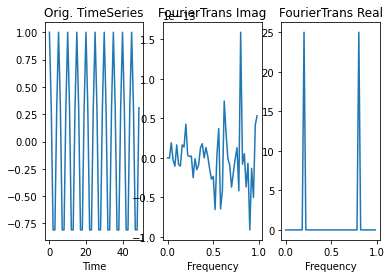

In [59]:
# Plot the results
plt.subplot(1,3,1) #Left Plot
plt.plot (time,Z)
plt.title('Orig. TimeSeries')
plt.xlabel('Time')

# Plot the Transform, Real Imaginary
plt.subplot(1,3,2) # Right Plot
plt.plot(f,np.imag(ZK),'-')
plt.title('FourierTrans Imag')
plt.xlabel('Frequency')

# Plot the Transform, Real Imaginary
plt.subplot(1,3,3) # Right Plot
plt.plot(f,np.real(ZK),'-')
plt.title('FourierTrans Real')
plt.xlabel('Frequency')



### You get peaks at 0.2 and 0.8. The peak at 0.8 is due to aliasing

### In this case, the imaginary part is basically 0 (The noisy graph look at the scale 1e-13)

### Try changing the cos to sin

In [ ]:
### Now let us plot the power spectrum

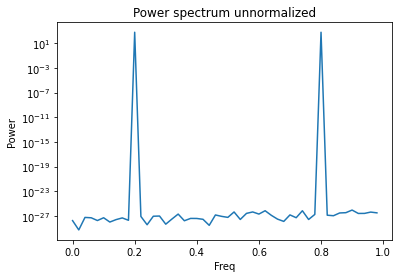

In [63]:
powspec =np.zeros(N)
for i in range(N):
    powspec[i] = abs(ZK[i])**2
plt.semilogy(f, powspec,'-')
plt.title('Power spectrum unnormalized')
plt.xlabel('Freq')
plt.ylabel('Power')
plt.show()